In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data_inactivity = pd.read_csv('inactivity.csv', usecols=['FIPS', '% INACTIVE']) #FIPDS
data_obesity = pd.read_csv('obesity.csv', usecols=['FIPS', '% OBESE'])
data_diabetes = pd.read_csv('diabetes.csv', usecols=['FIPS', '% DIABETIC',])

inac_ob = pd.merge(data_inactivity, data_obesity, on='FIPS', how='inner')

dataset = pd.merge(inac_ob, data_diabetes, on='FIPS', how='inner')



In [4]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=50, random_state=0)

In [40]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
# y_pred = regressor.predict(X_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Training Data)')

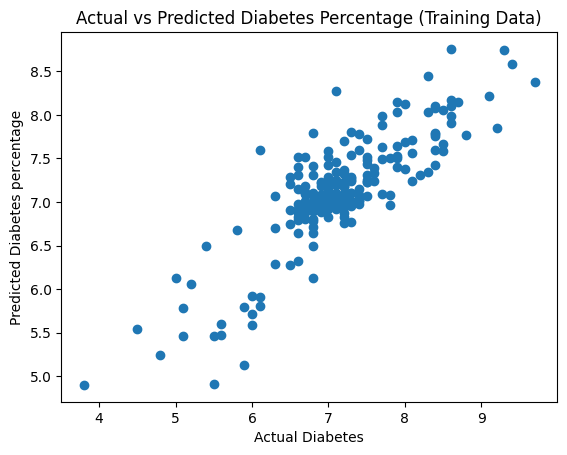

In [41]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Training Data)")

In [42]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.7073220730363938

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Testing Data)')

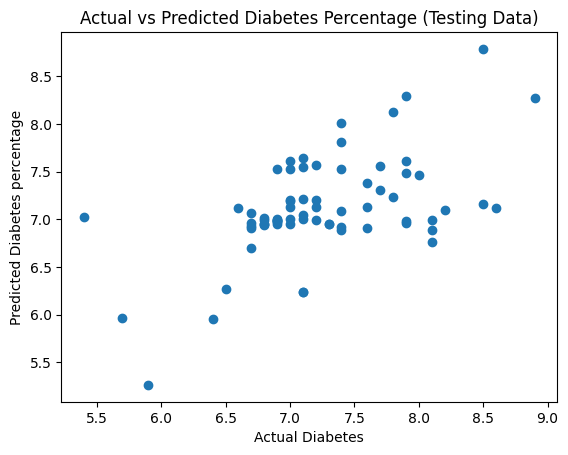

In [43]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Testing Data)")

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.19675807298586967

In [46]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')


In [47]:
cross_val_r2

array([0.45857866, 0.1461435 , 0.37846895, 0.26363192, 0.30596135])

In [48]:
cv_range = np.max(cross_val_r2) - np.min(cross_val_r2)
print("Range of R-squared: ", cv_range)
cv_std = np.std(cross_val_r2)
print("Standard Deviation of R-squared: ", cv_std)
q75, q25 = np.percentile(cross_val_r2, [75 ,25])
cv_iqr = q75 - q25
print("Interquartile Range of R-squared: ", cv_iqr)


Range of R-squared:  0.3124351629532487
Standard Deviation of R-squared:  0.10561943827466556
Interquartile Range of R-squared:  0.11483703800520373


In [ ]:
# Next Steps:

# Consider further exploration of hyperparameter tuning or model configuration to potentially reduce this variability.
# Evaluate the model on additional metrics to gain a more comprehensive understanding of its performance.
# Investigate whether there are specific characteristics of the data or subsets where the model consistently performs well or poorly.
